<a href="https://colab.research.google.com/github/pingli10/sales-predictions/blob/main/Copy_of_project_1_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
filename = '/content/drive/MyDrive/coding dojo/week 3 4 project 3 part 3/sales_predictions (1).csv'
df = pd.read_csv(filename)






In [87]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [88]:
#rows and columns
df.shape

(8523, 12)

In [89]:
#2.datatypes of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [90]:
#3.Are there duplicates 
df.duplicated().sum()


0

In [91]:

#4.identify missing values
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [92]:

#5. how to address missing value, for specific items missing value 
# From observing data, we know that Item_Outlet_Sales are the most important value
# The Item_sales value depends on Item_weight and Outlet_Size.
# It is based on (MAR)missing at random method, the values between item_weigt and item size are unrelated to item sales 

df_item_w = df['Item_Weight'].isna()
df_item_size = df['Outlet_Size'].isna()
df_w_lk = df[df_item_w]
df_s_lk = df[df_item_size]

df['Outlet_Size'].fillna('Missing',inplace=True)
df.dropna(inplace=True)
df.isna().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [93]:
#6.To confirm no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [143]:
#check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                7060 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 975.1+ KB


In [94]:
#7.Fixed inconsistent categories of data LF to Low Fat, reg to Regular and low fat to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat').replace('reg','Regular').replace('low fat','Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

In [95]:
#8.find the min, max, and mean of  Item_MRP , Item_Outlet_Sales
#df['Item_Weight'].value_counts()

val = df.groupby('Item_Type').agg({'Item_MRP':['min','max','mean'],'Item_Outlet_Sales':['min','max','mean'],'Item_Weight':['min','max','mean']}).round(2)


val


Item_MRP                 Item_Outlet_Sales            \
                           min     max    mean               min       max   
Item_Type                                                                    
Baking Goods             33.99  265.56  126.10             48.60   7931.68   
Breads                   31.96  263.26  140.51             35.29   7064.80   
Breakfast                40.05  234.93  142.65             39.95   6930.98   
Canned                   36.35  266.89  139.24             41.95   7590.12   
Dairy                    33.49  266.69  149.34             47.27  10256.65   
Frozen Foods             32.06  264.89  139.22             36.62   9275.93   
Fruits and Vegetables    36.25  264.23  144.44             45.27   8994.96   
Hard Drinks              34.25  261.43  138.04             71.91   7843.12   
Health and Hygiene       33.12  266.69  131.13             37.95   9779.94   
Household                32.46  264.79  149.16             33.29   7240.58   
Meat                     34.75  261.59  139.94             47.94   6729.91   
Others                   35.02  254.90  135.95             55.26   6008.84   
Seafood                  33.92  240.29  145.05            158.46   6503.53   
Snack Foods              32.36  264.96  146.71             45.94   9069.53   
Soft Drinks              31.49  263.59  131.80             33.29   7696.65   
Starchy Foods            34.05  263.03  147.69             58.59   8132.08   

                               Item_Weight                
                          mean         min    max   mean  
Item_Type                                                 
Baking Goods           1916.45        4.88  20.85  12.28  
Breads                 2145.94        4.64  20.85  11.35  
Breakfast              2001.17        6.42  21.10  12.77  
Canned                 2143.34        4.62  21.35  12.31  
Dairy                  2198.11        4.80  20.70  13.43  
Frozen Foods           2081.07        4.56  20.85  12.87  
Fruits and Vegetables  2178.58        5.46  21.35  13.22  
Hard Drinks            2060.48        4.61  19.70  11.40  
Health and Hygiene     1942.26        5.18  21.25  13.14  
Household              2185.82        5.03  21.25  13.38  
Meat                   2045.35        5.15  21.25  12.82  
Others                 2047.31        5.50  20.50  13.85  
Seafood                2523.96        5.36  20.75  12.55  
Snack Foods            2220.69        5.10  21.25  12.99  
Soft Drinks            1967.81        4.59  20.75  11.85  
Starchy Foods          2315.87        6.70  21.20  13.69

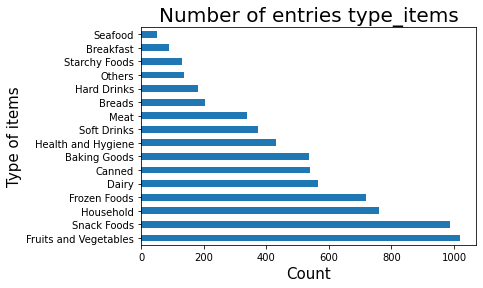

In [96]:
#Distirbution of item_type
item_counts = df['Item_Type'].value_counts()
item_counts.plot(kind='barh')
plt.title('Number of entries type_items',fontsize = 20)
plt.ylabel('Type of items',fontsize = 15)
plt.xlabel('Count',fontsize = 15)
plt.show()

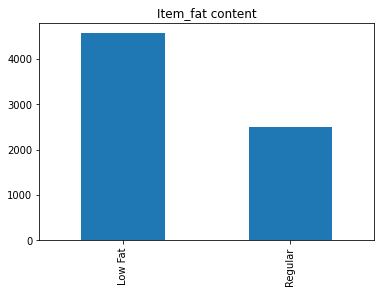

In [97]:
# Distribution of item_fat
item_fat = df['Item_Fat_Content'].value_counts()
item_fat.plot(kind='bar')
#item_fat
plt.title('Item_fat content')
plt.show()

#low fat items has great distribution

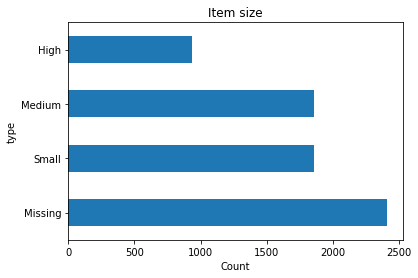

In [98]:
# Distribution of item_size 
item_size = df['Outlet_Size'].value_counts()
item_size.plot(kind='barh')
#item_fat
plt.title('Item size')
plt.xlabel('Count')
plt.ylabel('type')
plt.show()

#medium size items have great distirbution

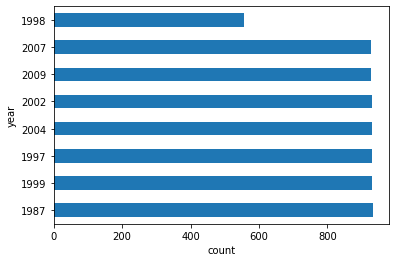

In [99]:
#distribution of items in year 
year = df['Outlet_Establishment_Year'].value_counts()
year.plot(kind='barh')
plt.xlabel('count')
plt.ylabel('year')
plt.show()

#1985 is a great distribution year

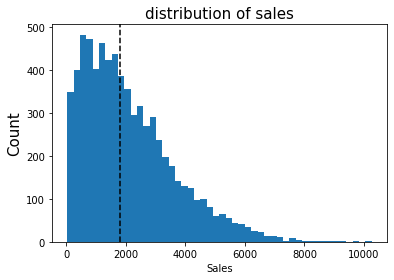

In [100]:
# distribution of Item_Outlet_Sales
plt.hist(df['Item_Outlet_Sales'],bins='auto');
plt.title('distribution of sales',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Sales')
plt.axvline(df['Item_Outlet_Sales'].median(),color='black',ls='--')

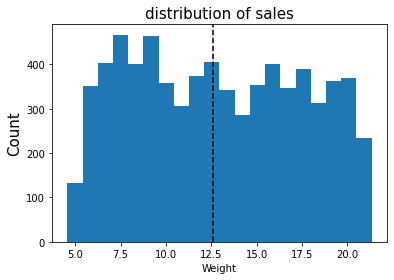

In [101]:
# distribution of Item_Outlet_Sales
plt.hist(df['Item_Weight'],bins='auto');
plt.title('distribution of sales',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Weight')
plt.axvline(df['Item_Weight'].median(),color='black',ls='--')

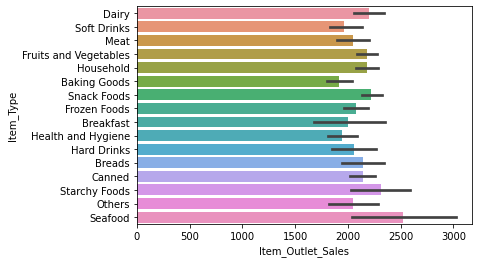

In [102]:
#distribution of item_outlet_sales by each item
sns.barplot(data=df,x='Item_Outlet_Sales',y='Item_Type');


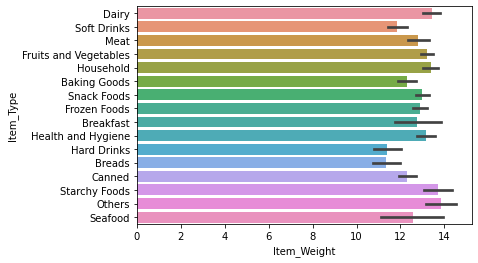

In [103]:
#distribution of item_weight by each item
sns.barplot(data=df,x='Item_Weight',y='Item_Type');

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


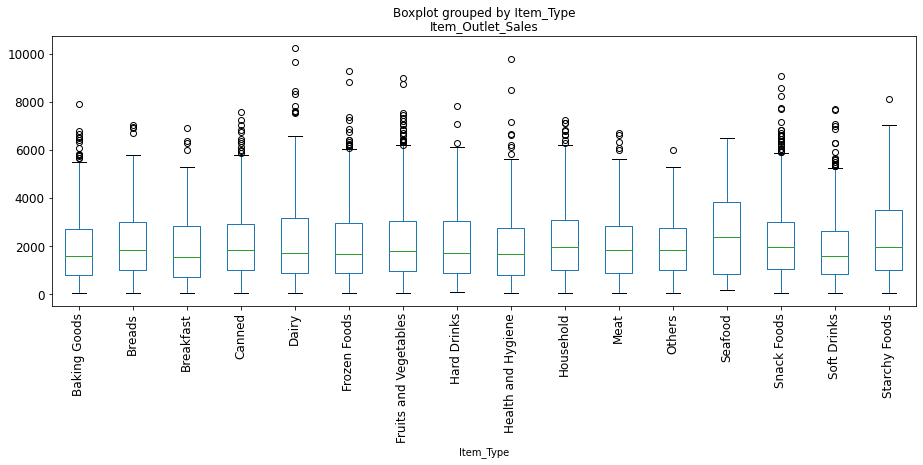

In [104]:
#distribution of item_weight
df.boxplot(['Item_Outlet_Sales'],
           by='Item_Type',
           figsize=(15,5),
           fontsize = 12,
           rot=90,
           grid=False
           );
plt.show();

#Starchy Foods have great variety 

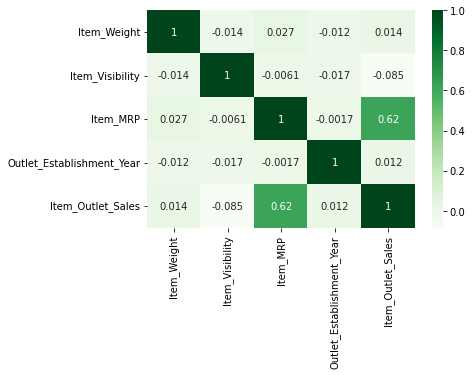

In [105]:
# correlation chart
corr = df.corr()
sns.heatmap(corr,cmap='Greens',annot=True);

In [106]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [125]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.006061,-0.016935,-0.085334
Item_MRP,0.027141,-0.006061,1.000000,-0.001657,0.620961
Outlet_Establishment_Year,-0.011588,-0.016935,-0.001657,1.000000,0.012212
Item_Outlet_Sales,0.014123,-0.085334,0.620961,0.012212,1.000000


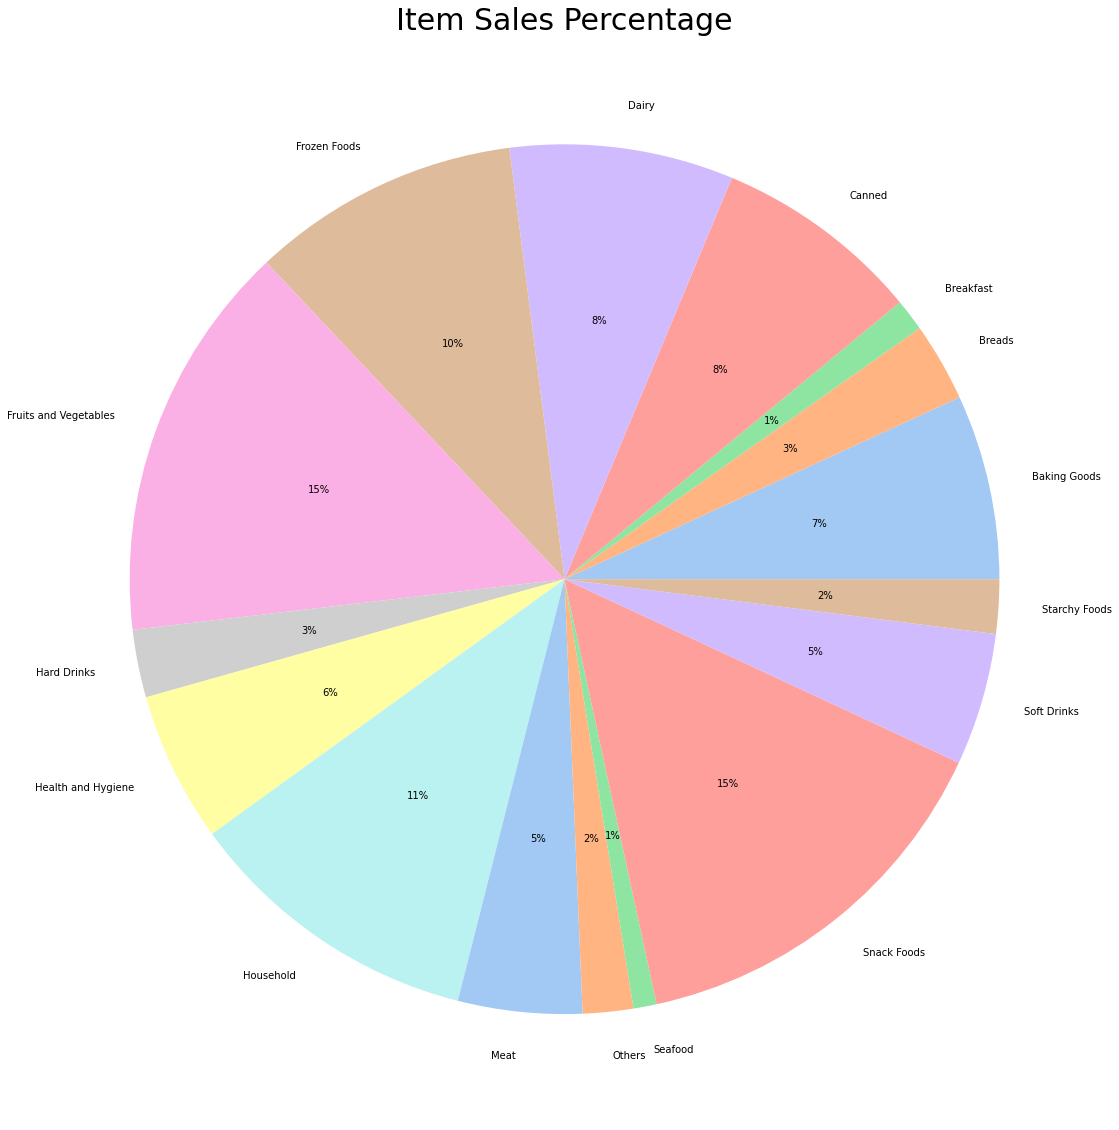

In [144]:
# the item sales percentage pie chart 
g = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(30,20))
colors = sns.color_palette('pastel')
plt.title('Item Sales Percentage',fontsize=30)
plt.pie(g.values,labels=g.index, colors = colors,autopct = '%0.0f%%')
plt.show()
# snack foods and fruits vegetables are the greatest value and take up either 15% of the pie

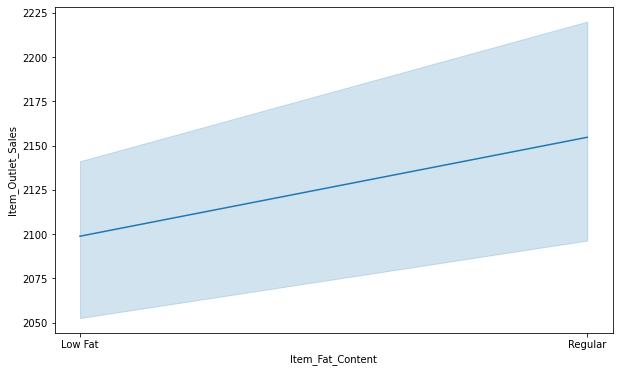

In [147]:
# The relationship between item content and item sales
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='Item_Fat_Content',y='Item_Outlet_Sales');
# There is a postive relationship between item fat content and item outlet sales
# More people consume regular fat content

There are more consumers prefer regular fat content, Snack Foods and Fruit Vegetavles are both 15% which is highest value in the pie chart